In [2]:
%run ../code/helloUCLH.py


Hello Niall



Shall I continue?  yes




EMAP has been built

    ... here at UCLH

    ... for the NHS

according to the following principles ...


1. Protection of operational systems
2. Protection of patient privacy:
   A 'code to data' rather than 'data to code' paradigm
3. Near real-time over retrospective batch loads
4. Interoperability for semantic collaboration
5. Scalable through open source

Thank you and goodbye



In [4]:
%run ../code/ids_demo.py

/usr/local/lib/python3.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [5]:
DSN

'host=212.71.245.199 dbname=omopuclh user=uclh password=uclh port=55432'

In [6]:
conn = psycopg2.connect(DSN)

In [7]:
conn.get_dsn_parameters()

{'user': 'uclh',
 'dbname': 'omopuclh',
 'host': '212.71.245.199',
 'port': '55432',
 'tty': '',
 'options': '',
 'sslmode': 'prefer',
 'sslcompression': '0',
 'krbsrvname': 'postgres',
 'target_session_attrs': 'any'}

In [8]:
cursor = conn.cursor()
cursor.execute('SELECT version();')
record = cursor.fetchone()
print(record)

('PostgreSQL 10.5 on x86_64-pc-linux-musl, compiled by gcc (Alpine 6.4.0) 6.4.0, 64-bit',)


In [9]:
cursor = conn.cursor()
cursor.execute('SELECT visit_start_date FROM public.visit_occurrence;')
records = cursor.fetchall()
print([r for r in records])

[(datetime.date(2018, 6, 11),), (datetime.date(2018, 10, 26),), (datetime.date(2018, 2, 8),), (datetime.date(2018, 11, 6),), (datetime.date(2018, 5, 24),)]


In [83]:
import pandas as pd
SQL = 'SELECT * FROM measurement;'
df = pd.read_sql(SQL, conn)

In [85]:
df['value_as_number'].mean()

45.55085508127479

In [91]:
df =df[['measurement_datetime', 'value_as_number']]

In [92]:
import altair as alt
chart = alt.Chart(df)

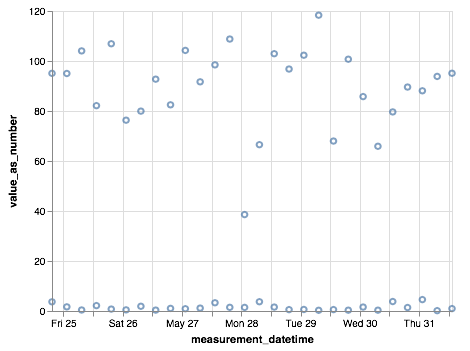

In [94]:
alt.Chart(df).mark_point().encode(
    x='measurement_datetime',
    y='value_as_number'
)

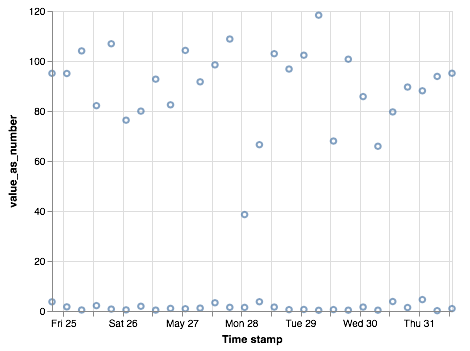

In [95]:
alt.Chart(df).mark_point().encode(
    alt.X('measurement_datetime', axis=alt.Axis(title='Time stamp')),
    y='value_as_number'
)